<a href="https://colab.research.google.com/github/20144481NguyenMinhTruong/NguyenMinhTruong20144481/blob/main/bai_tap_luong_mua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 35.8 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=e0bb1e66f735939673814b3f584cf147e9e6fc45a173a884c8196d2df96c1986
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


Nhập toc do gio (từ 0.7 đến 3.1 (đơn vị m/s)) : 2
Nhập nhiet do (từ 20.4 đến 41.2 (đơn vị do C)) : 30
Luong mua la:  2.2 mm


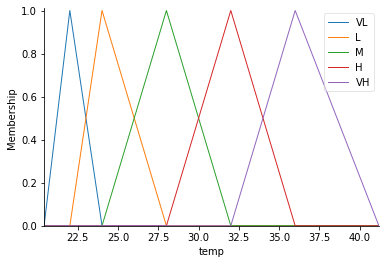

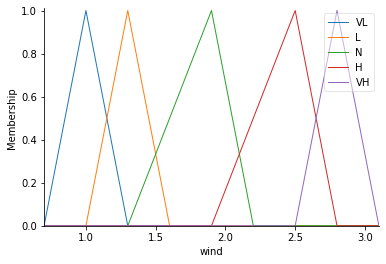

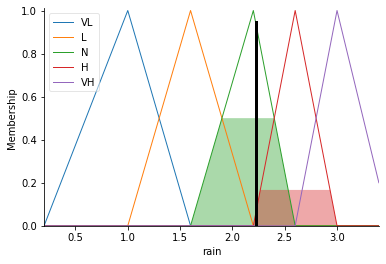

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temp=ctrl.Antecedent(np.arange(20.4,41.2,0.1),'temp')
wind = ctrl.Antecedent(np.arange(0.7,3.1,0.1),'wind')
rain=ctrl.Consequent(np.arange(0.2,3.5,0.1),'rain')

temp['VL']=fuzz.trimf(temp.universe,[20.4,22,24])
temp['L']=fuzz.trimf(temp.universe,[22,24,28])
temp['M']=fuzz.trimf(temp.universe,[24,28,32])
temp['H']=fuzz.trimf(temp.universe,[28,32,36])
temp['VH']=fuzz.trimf(temp.universe,[32,36,41.2])

wind['VL']=fuzz.trimf(wind.universe,[0.7,1,1.3])
wind['L']=fuzz.trimf(wind.universe,[1,1.3,1.6])
wind['N']=fuzz.trimf(wind.universe,[1.3,1.9,2.2])
wind['H']=fuzz.trimf(wind.universe,[1.9,2.5,2.8])
wind['VH']=fuzz.trimf(wind.universe,[2.5,2.8,3.1])

rain['VL']=fuzz.trimf(rain.universe,[0.2,1,1.6])
rain['L']=fuzz.trimf(rain.universe,[1,1.6,2.2])
rain['N']=fuzz.trimf(rain.universe,[1.6,2.2,2.6])
rain['H']=fuzz.trimf(rain.universe,[2.2,2.6,3])
rain['VH']=fuzz.trimf(rain.universe,[2.6,3,3.5])

rule1=ctrl.Rule(temp['VL']&wind['VL'],rain['VL'])
rule2=ctrl.Rule(temp['L']&wind['VL'],rain['VL'])
rule3=ctrl.Rule(temp['M']&wind['VL'],rain['L'])
rule4 =ctrl.Rule(temp['H']&wind['VL'], rain['N'])
rule5=ctrl.Rule(temp['VH']&wind['VL'],rain['N'])

rule6=ctrl.Rule(temp['VL']&wind['L'],rain['VL'])
rule7=ctrl.Rule(temp['L']&wind['L'],rain['VL'])
rule8=ctrl.Rule(temp['M']&wind['L'],rain['L'])
rule9=ctrl.Rule(temp['H']&wind['L'], rain['N'])
rule10=ctrl.Rule(temp['VH']&wind['L'],rain['H'])
rule11=ctrl.Rule(temp['VL']&wind['N'],rain['L'])
rule12=ctrl.Rule(temp['L']&wind['N'],rain['L'])
rule13=ctrl.Rule(temp['M']&wind['N'],rain['N'])
rule14=ctrl.Rule(temp['H']&wind['N'], rain['N'])
rule15=ctrl.Rule(temp['VH']&wind['N'],rain['H'])

rule16=ctrl.Rule(temp['VL']&wind['H'],rain['N'])
rule17=ctrl.Rule(temp['L']&wind['H'],rain['N'])
rule18=ctrl.Rule(temp['M']&wind['H'],rain['H'])
rule19=ctrl.Rule(temp['H']&wind['H'], rain['H'])
rule20=ctrl.Rule(temp['VH']&wind['H'],rain['VH'])

rule21=ctrl.Rule(temp['VL']&wind['VH'],rain['N'])
rule22=ctrl.Rule(temp['L']&wind['VH'],rain['H'])
rule23=ctrl.Rule(temp['M']&wind['VH'],rain['H'])
rule24=ctrl.Rule(temp['H']&wind['VH'], rain['VH'])
rule25=ctrl.Rule(temp['VH']&wind['VH'],rain['VH'])

rainfall_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule20,rule21,rule22,rule23,rule24,rule25])
rainfall = ctrl.ControlSystemSimulation(rainfall_ctrl)

rainfall.input['wind']=float(input("Nhập toc do gio (từ 0.7 đến 3.1 (đơn vị m/s)) : "))
rainfall.input['temp']=float(input("Nhập nhiet do (từ 20.4 đến 41.2 (đơn vị do C)) : "))
rainfall.compute()

print("Luong mua la: " ,round((rainfall.output['rain']),1),'mm')

temp.view()
wind.view()
rain.view(sim=rainfall)